Missing Values:
Series([], dtype: int64)
Number of duplicate rows removed: 0
Outlier Counts:
{'Sales': np.int64(1167), 'Quantity': np.int64(170), 'Discount': np.int64(856), 'Profit': np.int64(1881)}


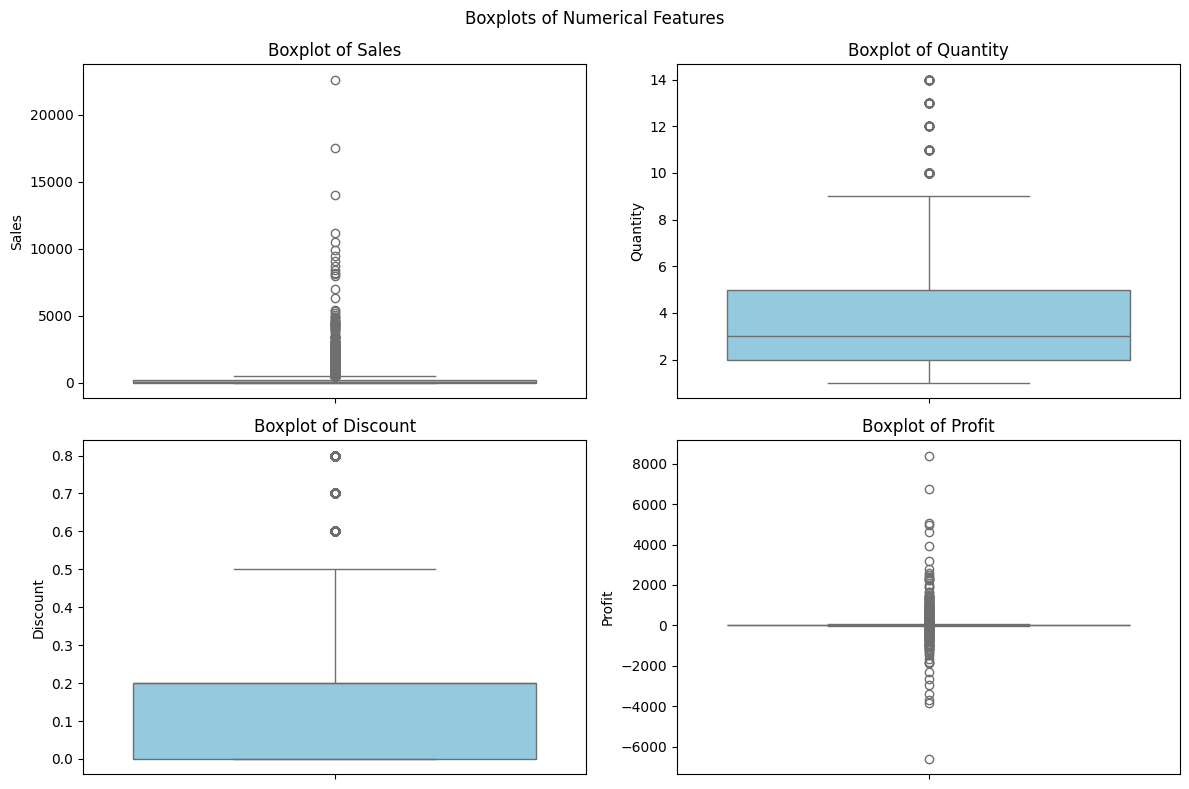

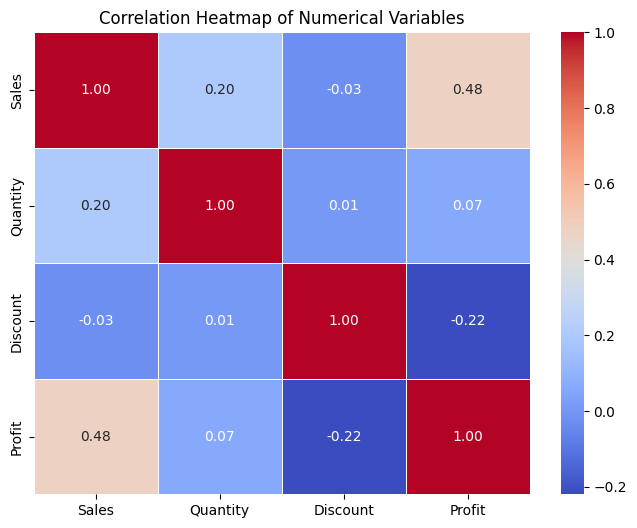

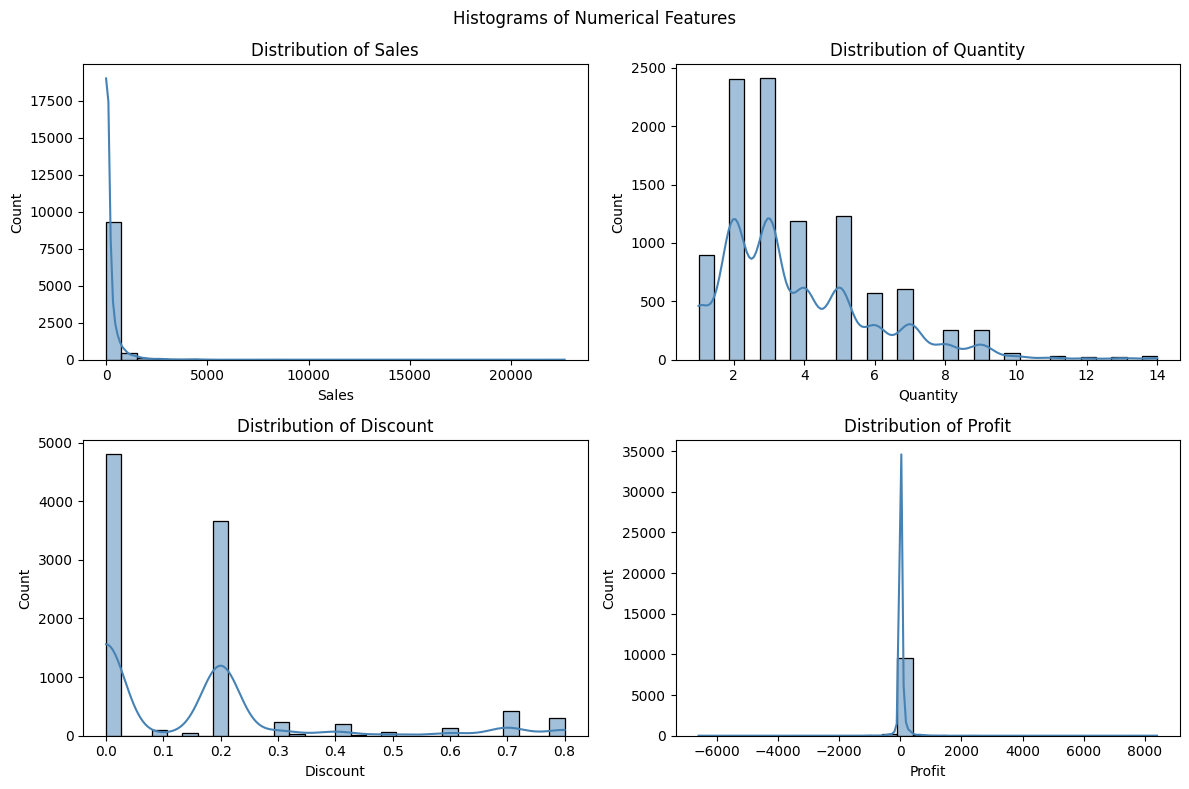

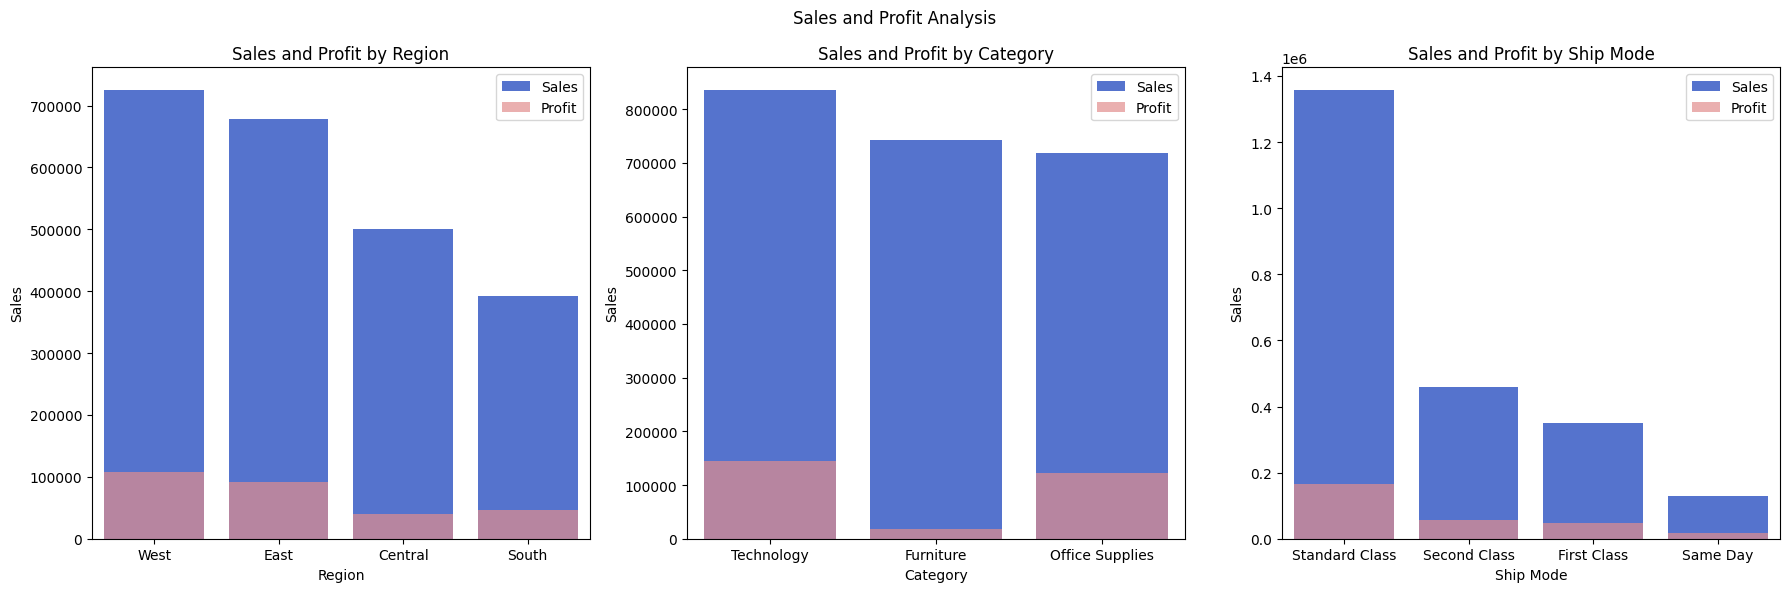

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with explicit encoding to handle potential issues
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")

# Convert date columns to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors='coerce')

# Convert Postal Code to string
df["Postal Code"] = df["Postal Code"].astype(str)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Detect and handle duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {duplicates}")

# Identify outliers using IQR
numerical_cols = ["Sales", "Quantity", "Discount", "Profit"]
outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

print("Outlier Counts:")
print(outlier_counts)

# Boxplots for outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplots of Numerical Features")

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histograms of Numerical Features")

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color="steelblue")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Sales and Profit by Region, Category, and Ship Mode
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Sales and Profit Analysis")

# Region
df_region = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_region.index, y=df_region["Sales"], ax=axes[0], color="royalblue", label="Sales")
sns.barplot(x=df_region.index, y=df_region["Profit"], ax=axes[0], color="lightcoral", alpha=0.7, label="Profit")
axes[0].set_title("Sales and Profit by Region")
axes[0].legend()

# Category
df_category = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_category.index, y=df_category["Sales"], ax=axes[1], color="royalblue", label="Sales")
sns.barplot(x=df_category.index, y=df_category["Profit"], ax=axes[1], color="lightcoral", alpha=0.7, label="Profit")
axes[1].set_title("Sales and Profit by Category")
axes[1].legend()

# Ship Mode
df_shipmode = df.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_shipmode.index, y=df_shipmode["Sales"], ax=axes[2], color="royalblue", label="Sales")
sns.barplot(x=df_shipmode.index, y=df_shipmode["Profit"], ax=axes[2], color="lightcoral", alpha=0.7, label="Profit")
axes[2].set_title("Sales and Profit by Ship Mode")
axes[2].legend()

plt.tight_layout()
plt.show()


Missing Values:
Series([], dtype: int64)
Number of duplicate rows removed: 0
Outlier Counts:
{'Sales': np.int64(1167), 'Quantity': np.int64(170), 'Discount': np.int64(856), 'Profit': np.int64(1881)}


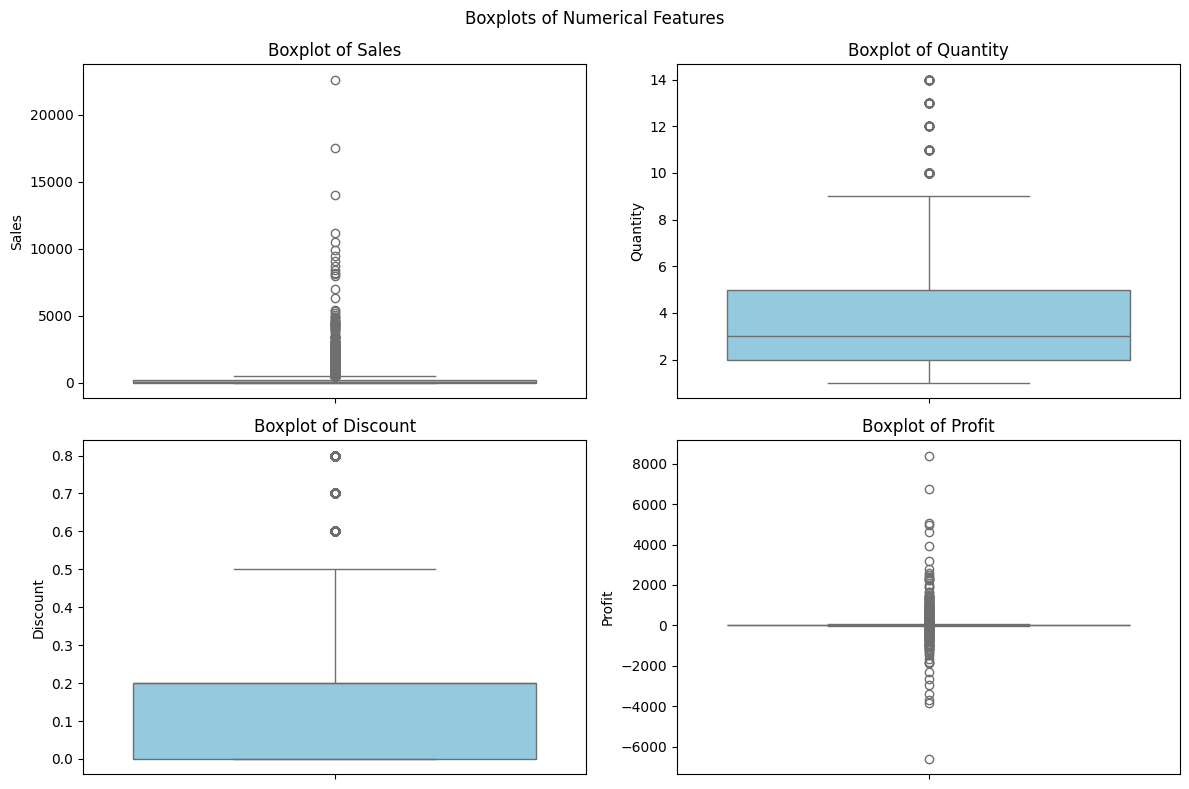

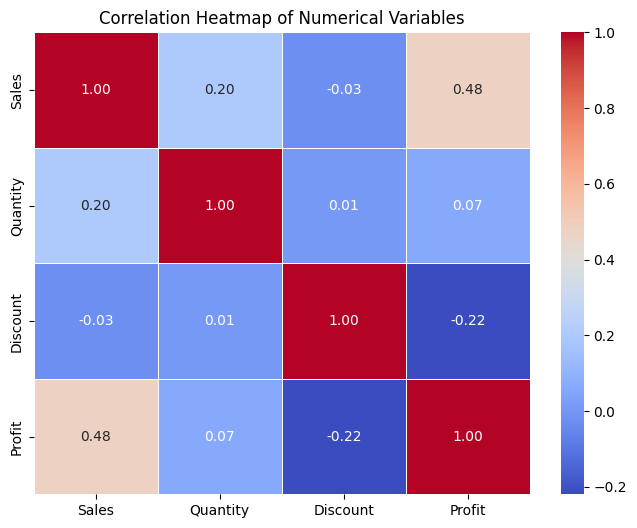

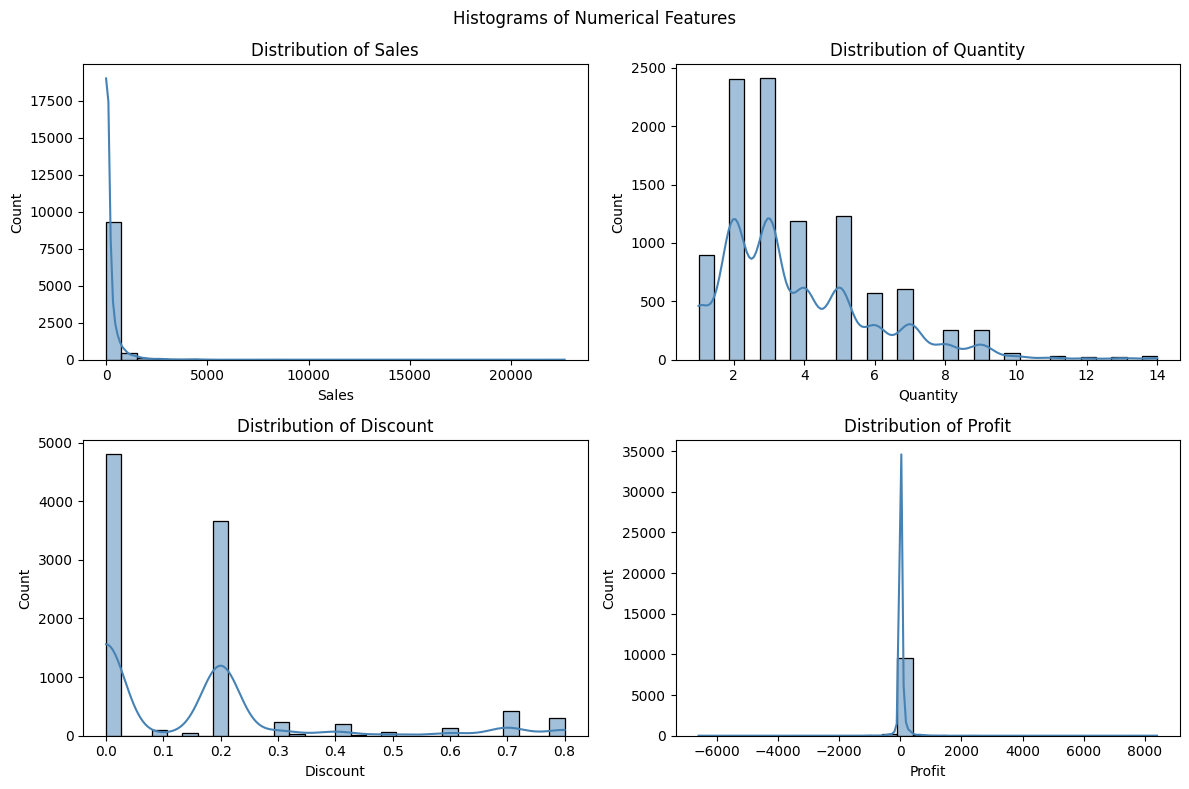

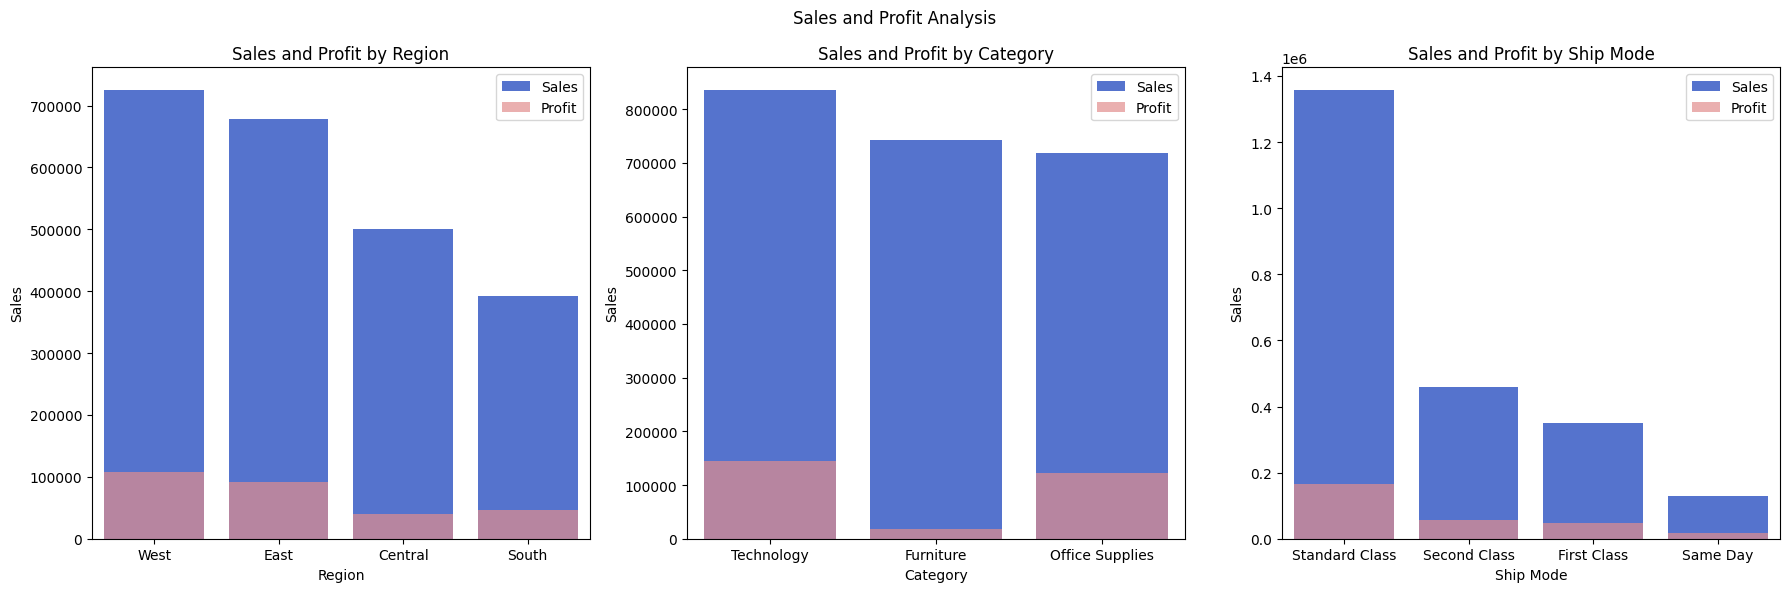

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with explicit encoding to handle potential issues
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")

# Convert date columns to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors='coerce')

# Convert Postal Code to string
df["Postal Code"] = df["Postal Code"].astype(str)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Detect and handle duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {duplicates}")

# Identify outliers using IQR
numerical_cols = ["Sales", "Quantity", "Discount", "Profit"]
outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

print("Outlier Counts:")
print(outlier_counts)

# Boxplots for outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplots of Numerical Features")

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histograms of Numerical Features")

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color="steelblue")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Sales and Profit by Region, Category, and Ship Mode
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Sales and Profit Analysis")

# Region
df_region = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_region.index, y=df_region["Sales"], ax=axes[0], color="royalblue", label="Sales")
sns.barplot(x=df_region.index, y=df_region["Profit"], ax=axes[0], color="lightcoral", alpha=0.7, label="Profit")
axes[0].set_title("Sales and Profit by Region")
axes[0].legend()

# Category
df_category = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_category.index, y=df_category["Sales"], ax=axes[1], color="royalblue", label="Sales")
sns.barplot(x=df_category.index, y=df_category["Profit"], ax=axes[1], color="lightcoral", alpha=0.7, label="Profit")
axes[1].set_title("Sales and Profit by Category")
axes[1].legend()

# Ship Mode
df_shipmode = df.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
sns.barplot(x=df_shipmode.index, y=df_shipmode["Sales"], ax=axes[2], color="royalblue", label="Sales")
sns.barplot(x=df_shipmode.index, y=df_shipmode["Profit"], ax=axes[2], color="lightcoral", alpha=0.7, label="Profit")
axes[2].set_title("Sales and Profit by Ship Mode")
axes[2].legend()

plt.tight_layout()
plt.show()
